## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
Results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(Results['Mouse ID'].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = Results.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = Results[(Results['Mouse ID'] == 'g989')]
g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
FullResults = Results.drop(Results.index[908: 921])
FullResults

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame. should be 248
len(FullResults['Mouse ID'].unique())

248

## Summary Statistics

In [10]:
Regimen = FullResults['Drug Regimen']
Regimen

0       Ramicane
1       Ramicane
2       Ramicane
3       Ramicane
4       Ramicane
          ...   
1888    Naftisol
1889    Naftisol
1890    Naftisol
1891    Naftisol
1892    Naftisol
Name: Drug Regimen, Length: 1880, dtype: object

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Stats = FullResults.groupby(['Drug Regimen'])
Mean = Stats["Tumor Volume (mm3)"].mean()
Median = Stats["Tumor Volume (mm3)"].median()
Variance = Stats["Tumor Volume (mm3)"].var()
Std = Stats["Tumor Volume (mm3)"].std()
Sem = Stats["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Nonagg = pd.DataFrame({"Average Tumor Volume (mm3)": Mean,
                       "Median Tumor Volume (mm3)": Median,
                       "Variance of Tumor Volume (mm3)": Variance,
                      "Tumor Volume Std. Dev.": Std,
                      "Tumor Volume Std. Err.": Sem})
Nonagg


,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Stats.agg({"Tumor Volume (mm3)": ['mean', 'median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

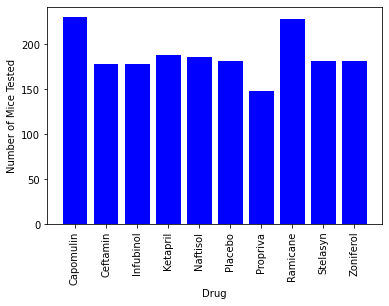

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count = Stats['Timepoint'].count()
drug = pd.DataFrame(Stats['Drug Regimen'])
x_axis = np.arange(len(count))
plt.bar(x_axis, count, color='blue')
ticks = [value for value in x_axis]
plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
                  'Ramicane', 'Stelasyn', 'Zoniferol'], rotation='vertical')
plt.xlabel('Drug')
plt.ylabel('Number of Mice Tested')




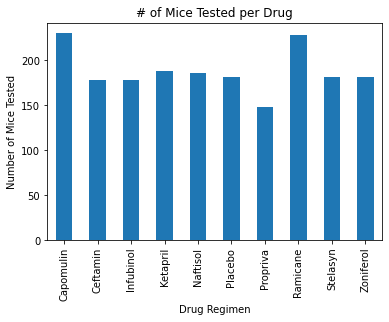

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plot = count.plot(kind='bar', title='# of Mice Tested per Drug',
                        xlabel='Drug Regimen', ylabel='Number of Mice Tested')

([<matplotlib.patches.Wedge at 0x207b70da1c0>,
 [Text(-0.9687380377330543, -0.521101347387542, 'Female'),
  Text(0.9687380377330543, 0.5211013473875419, 'Male')],
 [Text(-0.5284025660362114, -0.28423709857502283, '49.0%'),
  Text(0.5284025660362114, 0.2842370985750228, '51.0%')])

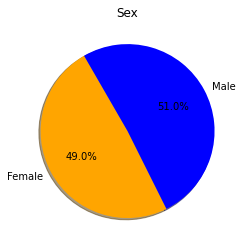

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
MF = FullResults.groupby(['Sex'])
CT= MF["Sex"].count()
colors = ['orange', 'blue']

Sex = ['Female', 'Male']
plt.title('Sex')
plt.pie(CT, labels=Sex, colors=colors, autopct="%1.1f%%", startangle=120, shadow=True)


<AxesSubplot:title={'center':'Sex'}>

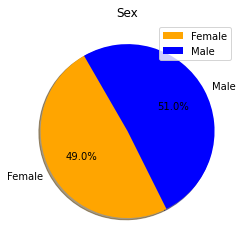

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#FullResults.groupby(['Sex']).sum().plot(kind='pie')
FullResults.groupby(['Sex']).count().plot(kind='pie', y='Timepoint', colors=colors, 
                                          autopct="%1.1f%%", startangle=120, shadow=True, ylabel='', 
                                          title = 'Sex')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse, groupby ID and find max point
Data = FullResults.groupby(['Mouse ID'])
Top = Data["Timepoint"].max()
Frame = pd.DataFrame({'Timepoint': Top})
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
FrameMerge = pd.merge(Frame, FullResults, on=['Mouse ID', "Timepoint"])
FrameMerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

DGR = FrameMerge.loc[(FrameMerge['Drug Regimen'] == "Capomulin") | (FrameMerge['Drug Regimen'] == "Ramicane") | 
                    (FrameMerge['Drug Regimen'] == "Infubinol") | (FrameMerge['Drug Regimen'] == "Ceftamin")]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment:    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    DrugRegimen = DGR.loc[(DGR['Drug Regimen'] == drug)]
    
    TumVol = DrugRegimen['Tumor Volume (mm3)']
    DR = pd.DataFrame({"Tumor Volume (mm3)": TumVol})

    # add subset 
    
    # Determine outliers using upper and lower bounds
    Quar = TumVol.quantile([.25,.5,.75])
    lower = Quar[.25]
    upper = Quar[.75]
    iqr = upper-lower
    LB = lower - (1.5*iqr)
    UB = upper + (1.5*iqr)
    Out = DR.loc[(DR['Tumor Volume (mm3)'] < LB) | (DR['Tumor Volume (mm3)'] > UB)]
    
    
    print(f"{drug}'s potential outliers: {Out}")


Capomulin's potential outliers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Infubinol's potential outliers:     Tumor Volume (mm3)
31           36.321346
Ceftamin's potential outliers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


Text(0, 0.5, 'Final Tumor Volume (mm3)')

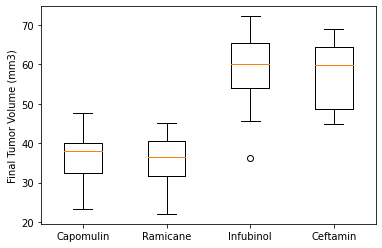

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capo = DGR.loc[(DGR['Drug Regimen'] == "Capomulin")]
Rami = DGR.loc[(DGR['Drug Regimen'] == "Ramicane")]
Infu = DGR.loc[(DGR['Drug Regimen'] == "Infubinol")]
Ceft = DGR.loc[(DGR['Drug Regimen'] == "Ceftamin")]


fig1, ax = plt.subplots()
ax.boxplot((Capo['Tumor Volume (mm3)'], Rami['Tumor Volume (mm3)'], 
            Infu['Tumor Volume (mm3)'], Ceft['Tumor Volume (mm3)']))
plt.xticks([1, 2, 3, 4], treatment)
ax.set_ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

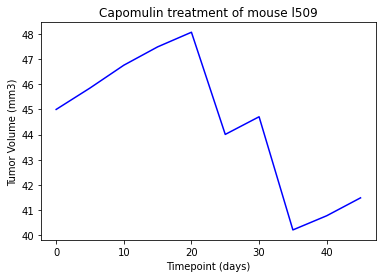

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ID = FullResults[(FullResults['Mouse ID'] == 'l509')]
TV = ID["Tumor Volume (mm3)"]
TP = ID['Timepoint']
plt.plot(TP, TV, color='blue')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse l509')
#Line = ID.plot(kind='line', title='# of Mice Tested per Drug', xlabel='Timepoint', ylabel='Tumor Volume (mm3)')

Text(0.5, 0, 'Weight (g)')

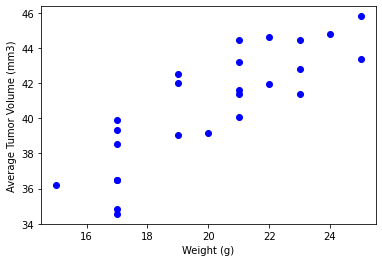

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
MouseID = FullResults.groupby(['Mouse ID'])
AVTV = MouseID["Tumor Volume (mm3)"].mean()
DFrame = pd.DataFrame({'Average Tumor Volume': AVTV})

AvFrame = pd.merge(DFrame, FrameMerge, on=['Mouse ID'])

Cap = AvFrame[(AvFrame['Drug Regimen'] == 'Capomulin')]
weight = Cap['Weight (g)']
AvTumorVol = Cap['Average Tumor Volume']

CapFrame = pd.DataFrame({
    'Weight': weight,
    'Average Tumor Volume': AvTumorVol
})


plt.scatter(weight, AvTumorVol, color='blue')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


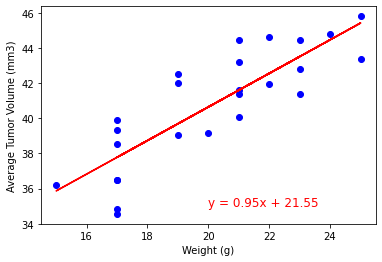

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(weight, AvTumorVol, color='blue')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Weight (g)')
(slope, yIntercept, rvalue, pvalue, sterr) = st.linregress(Cap['Weight (g)'], Cap['Average Tumor Volume'])
#regress_values
values = (Cap['Weight (g)'] * slope) + yIntercept
plt.plot(Cap['Weight (g)'], values, 'r')
line = f'y = {slope:.2f}x + {yIntercept:.2f}'
plt.annotate(line,(20,35), fontsize=12, color='r')
Cor = round(st.pearsonr(weight, AvTumorVol)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {Cor}")

## Observations

1. Propriva data could be untrustworth due to it being the lowest tested out of all the drugs. With all other drugs being tested on over 150 mice it is concerning to see it below 150.

2. Ramicane and Capomulin have the most trustworthy data because they have the most test subjects and the lowest Standard Error and lowest Standard Deviation.

3. With the test subjects of Capomulin there seems to be a strong correlation between the weight of the mouse and the size of the tumor. I would want to start testing on mice within a smaller weight range. 